<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_da/da11_str.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataFrame의 문자열 데이터 컬럼 다루기

In [1]:
import pandas as pd

In [2]:
file_path = 'https://github.com/wesm/pydata-book/raw/2nd-edition/datasets/movielens/movies.dat'

In [11]:
movies = pd.read_csv(file_path, 
                     sep='::',           # 구분자
                     encoding='cp1252',  # 영문 MS Windows에서 작성된 텍스트 파일 인코딩 타입
                     header=None,        # 파일의 첫번째 라인부터 데이터. 헤더 정보 없음.
                     names=['movie_id', 'title', 'genres'],  # 컬럼 이름 설정.
                     engine='python')    # ParserWarning을 제거
# 한글 MS Windows의 기본 인코딩: cp949

In [12]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
movies.tail()

,movie_id,title,genres
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama
3882,3952,"Contender, The (2000)",Drama|Thriller


In [14]:
movies.shape

(3883, 3)

In [15]:
# 장르가 Animation인 영화 몇 개? (hint: str.contains() 사용)
animations = movies[movies['genres'].str.contains('Animation')]
len(animations)

105

In [17]:
animations

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
12,13,Balto (1995),Animation|Children's
47,48,Pocahontas (1995),Animation|Children's|Musical|Romance
236,239,"Goofy Movie, A (1995)",Animation|Children's|Comedy|Romance
241,244,Gumby: The Movie (1995),Animation|Children's
...,...,...,...
3690,3759,Fun and Fancy Free (1947),Animation|Children's|Musical
3706,3775,Make Mine Music (1946),Animation|Children's|Musical
3707,3776,Melody Time (1948),Animation|Children's|Musical
3730,3799,Pokémon the Movie 2000 (2000),Animation|Children's


In [18]:
# 장르가 로맨틱 코미디(Romance & Comedy)인 영화는 몇 개?
romance_comedy = movies[movies['genres'].str.contains('Romance') &
                        movies['genres'].str.contains('Comedy')]
len(romance_comedy)

204

In [19]:
romance_comedy

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
38,39,Clueless (1995),Comedy|Romance
63,64,Two if by Sea (1996),Comedy|Romance
...,...,...,...
3679,3748,"Match, The (1999)",Comedy|Romance
3759,3829,Mad About Mambo (2000),Comedy|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance


In [24]:
# movies[movies['genres'].str.contains('Romance' or 'Comedy')]
print('Romance' or 'Comedy')
print('Romance' and 'Comedy')

Romance
Comedy


In [26]:
# movies[movies['genres'].str.contains('Romance' or 'Comedy')]
movies[movies['genres'].str.contains('Romance')]

,movie_id,title,genres
2,3,Grumpier Old Men (1995),Comedy|Romance
6,7,Sabrina (1995),Comedy|Romance
10,11,"American President, The (1995)",Comedy|Drama|Romance
14,15,Cutthroat Island (1995),Action|Adventure|Romance
16,17,Sense and Sensibility (1995),Drama|Romance
...,...,...,...
3785,3855,"Affair of Love, An (Une Liaison Pornographique...",Drama|Romance
3804,3874,"Couch in New York, A (1996)",Comedy|Romance
3815,3885,Love & Sex (2000),Comedy|Romance
3818,3888,Skipped Parts (2000),Drama|Romance


In [28]:
# movies[movies['genres'].str.contains('Romance' and 'Comedy')]
movies[movies['genres'].str.contains('Comedy')]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
6,7,Sabrina (1995),Comedy|Romance
...,...,...,...
3858,3928,Abbott and Costello Meet Frankenstein (1948),Comedy|Horror
3859,3929,"Bank Dick, The (1940)",Comedy
3873,3943,Bamboozled (2000),Comedy
3874,3944,Bootmen (2000),Comedy|Drama


In [33]:
# movies 데이터 프레임에 year 컬럼(파생변수) 추가 - 영화 개봉 연도를 int 타입으로 저장
title = 'Meet the Parents (2000)'
title[-5:-1]  # 문자열 slicing

'2000'

In [34]:
movies['year'] = movies['title'].str[-5:-1]
movies

,movie_id,title,genres,year
0,1,Toy Story (1995),Animation|Children's|Comedy,1995
1,2,Jumanji (1995),Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,2000
3879,3949,Requiem for a Dream (2000),Drama,2000
3880,3950,Tigerland (2000),Drama,2000
3881,3951,Two Family House (2000),Drama,2000


In [35]:
movies.dtypes

movie_id     int64
title       object
genres      object
year        object
dtype: object

In [36]:
movies['year'] = movies['year'].astype(int)  # pd.Series의 데이터 타입 변경
movies.dtypes

movie_id     int64
title       object
genres      object
year         int64
dtype: object

In [37]:
# 연도별 개봉 영화 숫자
#   (1) 개봉 영화 숫자 내림차순 정렬
#   (2) 개봉 연도의 오름차순 정렬
movies['year'].value_counts()

1996    345
1995    342
1998    337
1997    315
1999    283
       ... 
1923      3
1929      3
1922      2
1920      2
1921      1
Name: year, Length: 81, dtype: int64

In [40]:
movies['year'].value_counts().sort_index(ascending=True)

1919      3
1920      2
1921      1
1922      2
1923      3
       ... 
1996    345
1997    315
1998    337
1999    283
2000    156
Name: year, Length: 81, dtype: int64

In [41]:
import matplotlib.pyplot as plt

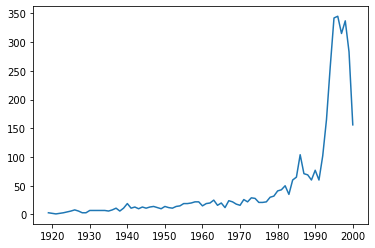

In [44]:
# 연도별 영화 숫자 선 그래프
s = movies['year'].value_counts().sort_index()
plt.plot(s.index, s.values)
plt.show()

In [55]:
# 장르별 영화 수 (hint: (1) str.split(), (2) dict 또는 defaultdict)
movies['genres'].str.split('|')

0        [Animation, Children's, Comedy]
1       [Adventure, Children's, Fantasy]
2                      [Comedy, Romance]
3                        [Comedy, Drama]
4                               [Comedy]
                      ...               
3878                            [Comedy]
3879                             [Drama]
3880                             [Drama]
3881                             [Drama]
3882                   [Drama, Thriller]
Name: genres, Length: 3883, dtype: object

In [51]:
arr = ['animation', 'comedy', 'drama', 'drama', 'comedy', 'comedy']
arr_cnt = {}  # empty dict
for x in arr:  # 리스트의 모든 원소들을 반복
    if x in arr_cnt.keys():  # 리스트의 원소가 dict의 key로 존재하면
        arr_cnt[x] += 1
    else:  # 리스트의 원소가 dict의 키로 존재하지 않으면
        arr_cnt[x] = 1
arr_cnt

{'animation': 1, 'comedy': 3, 'drama': 2}

In [52]:
from collections import defaultdict

In [56]:
arr_cnt2 = defaultdict(int)  # empty defaultdict. value들의 데이터 타입은 int.
for x in arr:
    arr_cnt2[x] += 1

arr_cnt2
pd.Series(arr_cnt2)

animation    1
comedy       3
drama        2
dtype: int64

In [61]:
genre_counts = defaultdict(int)
for genres in movies['genres'].str.split('|'):
    for g in genres:
        genre_counts[g] += 1

genre_counts = pd.Series(genre_counts)  # defaultdict 타입을 Series 타입으로 변환
genre_counts

Animation       105
Children's      251
Comedy         1200
Adventure       283
Fantasy          68
Romance         471
Drama          1603
Action          503
Crime           211
Thriller        492
Horror          343
Sci-Fi          276
Documentary     127
War             143
Musical         114
Mystery         106
Film-Noir        44
Western          68
dtype: int64